In [356]:
import pandas as pd

In [357]:
lit_df = pd.read_csv('overall_similarity_scores.csv')

In [358]:
lit_df.describe

<bound method NDFrame.describe of              Unnamed: 0  RelativeTotalCites  project_muse_388510  pq21-0324  \
0    RelativeTotalCites               0.000              135.070    147.029   
1   project_muse_388510             135.070                0.000    135.297   
2             pq21-0324             147.029              135.297      0.000   
3   ContentServer.asp-5              99.998              100.000     99.995   
4   ContentServer.asp-8              99.998              100.000     99.995   
..                  ...                 ...                  ...        ...   
82  project_muse_511194             195.562              194.446    189.745   
83              3327575              99.998              100.000     99.995   
84  project_muse_382726             180.314              185.540    199.975   
85             24439665             168.369              181.607    190.464   
86  project_muse_383319              99.998              100.000     99.995   

    ContentServer

In [359]:
lit_df = lit_df.rename(columns={'Unnamed: 0':'Articles'})

In [360]:
#generic formula for finding the value of a COLUMN at a given ROW based on the article name is:
#lit_df.loc[lit_df['Articles']=='ROW_ARTICLE_NAME']['COLUMN_ARTICLE_NAME']

In [361]:
lit_diffs = lit_df[['Articles','RelativeTotalCites']]

In [362]:
#this now is a selection of articles paired with their score relative to the entire literature. 
#to get a given article score you replace 'ARTICLE_NAME' in the following formula:
# lit_diffs.loc[lit_diffs['Articles']=='ARTICLE_NAME']['RelativeTotalCites']
lit_diffs

,Articles,RelativeTotalCites
0,RelativeTotalCites,0.000
1,project_muse_388510,135.070
2,pq21-0324,147.029
3,ContentServer.asp-5,99.998
4,ContentServer.asp-8,99.998
...,...,...
82,project_muse_511194,195.562
83,3327575,99.998
84,project_muse_382726,180.314
85,24439665,168.369


In [152]:
#eg. This gets you the location
lit_diffs.loc[lit_diffs['Articles']=='3327575-relative-score']['RelativeTotalCites']

81    174.222
Name: RelativeTotalCites, dtype: float64

In [153]:
#to get the value you then add .values[0] or .loc[0]
lit_diffs.loc[lit_diffs['Articles']=='3327575-relative-score']['RelativeTotalCites'].values[0]

174.22199999999995

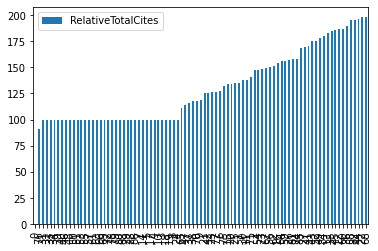

In [363]:
lit_diffs.sort_values('RelativeTotalCites').plot(kind="bar")

In [213]:
lit_diffs.sort_values('RelativeTotalCites').iloc[16]

Articles              out-relative-score
RelativeTotalCites               121.345
Name: 41, dtype: object

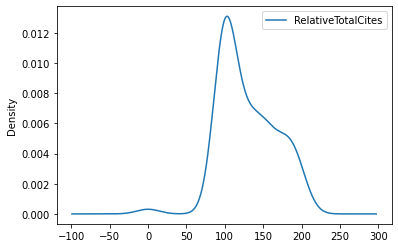

In [386]:
lit_diffs.sort_values('RelativeTotalCites').plot.kde()

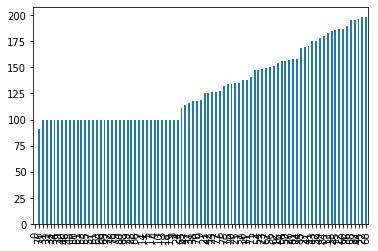

In [387]:
lit_diffs['RelativeTotalCites'].sort_values().plot.bar()

I think given how smooth this is, I can include 5 on either side as long as it's within five percent of the main article it's fine.

In [257]:
lit_diffs.loc[lit_diffs['Articles']=='3327575-relative-score']
lit_diffs.loc[lit_diffs['Articles']=='3327575-relative-score']['RelativeTotalCites'].values[0]

174.22199999999995

In [245]:
lit_diffs['Articles'][15]

'2653404-2-relative-score'

To get the List of Similars, I think it would be good to do two things:
First, get the articles within 5%
Second, make sure those are all of the top matches in the individual article comparison

In [258]:
lit_diffs['Articles']

0                     RelativeTotalCites
1     project_muse_388510-relative-score
2               pq21-0324-relative-score
3     ContentServer.asp-5-relative-score
4     ContentServer.asp-8-relative-score
                     ...                
80    project_muse_511194-relative-score
81                3327575-relative-score
82    project_muse_382726-relative-score
83               24439665-relative-score
84    project_muse_383319-relative-score
Name: Articles, Length: 85, dtype: object

In [276]:
def get_most_similar(article_in_name):
    #first, let's get all articles +/- 5% of overall score
    article_row_filter = lit_diffs['Articles'] == article_in_name
    relative_to_lit_score = lit_diffs.loc[article_row_filter]['RelativeTotalCites'].values[0]
    comp_list = []
    for comp_article in lit_diffs['Articles'].values:
        comp_article_row_filter = lit_diffs['Articles'] == comp_article
        comp_relative_to_lit_score = lit_diffs.loc[comp_article_row_filter]['RelativeTotalCites'].values[0]
        if (.95 * relative_to_lit_score) <= comp_relative_to_lit_score <= (1.05 * relative_to_lit_score):
            comp_list.append((comp_article, comp_relative_to_lit_score))
    print(relative_to_lit_score)
    return pd.DataFrame(comp_list, columns=['Articles','Scores']).sort_values('Scores')
        

In [277]:
get_most_similar('project_muse_383344-relative-score')

154.73399999999882


,Articles,Scores
5,27744766-relative-score,147.219
4,acpq_1990_0064_0002_0233_0247-relative-score,148.787
6,41441496-relative-score,150.441
1,WINKLER-2010-Philosophical_Books-relative-score,153.057
0,ContentServer.asp-6-relative-score,153.341
7,project_muse_388509-relative-score,153.973
9,project_muse_383344-relative-score,154.734
8,Kail-2008-European_Journal_of_Philosophy-relat...,158.430
2,pq9-0097-relative-score,159.774
3,1399612-relative-score,161.424


In [278]:
get_most_similar('1399612-relative-score')

161.42399999999873


,Articles,Scores
6,project_muse_388509-relative-score,153.973
10,project_muse_383344-relative-score,154.734
7,Kail-2008-European_Journal_of_Philosophy-relat...,158.430
3,pq9-0097-relative-score,159.774
4,1399612-relative-score,161.424
0,project_muse_388510-relative-score,162.771
11,ContentServer.asp-4-relative-score,163.953
1,humes_theory_of_the_self_and_its_identity-rela...,164.249
9,20708617-relative-score,164.322
12,24439665-relative-score,165.667


In [284]:
test_article_w_article_names = lit_df[['Articles', 'project_muse_383344-relative-score']]

In [298]:
only_over_100 = test_article_w_article_names.loc[test_article_w_article_names['project_muse_383344-relative-score']>100].sort_values('project_muse_383344-relative-score')

In [299]:
only_over_100

,Articles,project_muse_383344-relative-score
6,project_muse_439820-relative-score,136.626
64,project_muse_596651-relative-score,138.502
68,9780470776377.ch8-relative-score,139.280
10,humes_theory_of_the_self_and_its_identity-rela...,139.705
30,project_muse_403836-relative-score,145.843
...,...,...
56,2106947-relative-score,199.991
84,project_muse_383319-relative-score,199.992
70,ContentServer.asp-7-relative-score,199.993
3,ContentServer.asp-5-relative-score,199.993


In [316]:
get_most_similar('project_muse_383319-relative-score')

194.6339999999989


,Articles,Scores
5,2653404-2-relative-score,185.758
8,project_muse_391081-relative-score,186.578
9,project_muse_227867-relative-score,186.820
7,fzt013-relative-score,187.726
3,acpq_1995_0069_0003_0485_0501&pdfname=acpq_199...,188.087
12,ContentServer.asp-3-relative-score,188.548
23,Prolegomena_11_2_2012_Article_Lybaert-relative...,189.149
11,20131803-relative-score,189.464
1,ContentServer.asp-8-relative-score,189.685
14,Projection and Realism in Hume's Philosophy co...,190.681


In [308]:
def test_diff(d_a,d_b):
    total_difference = 0
    for para in d_a.keys():
        print(str(d_a[para]), 'minus', str(d_b[para]), 'is', str(abs(d_a[para] - d_b[para])))
        total_difference += abs(d_a[para] - d_b[para])
    return total_difference

In [315]:
a_dict = {'a': 0, 'b': .5, 'c': .1, 'd': .4}
b_dict = {'a': 0, 'b': 0, 'c': 0, 'd': 0}
test_diff(a_dict, b_dict)

0 minus 1 is 1
0.5 minus 0 is 0.5
0.1 minus 0 is 0.1
0.4 minus 0 is 0.4


2.0

In [323]:
lit_diffs.sort_values('RelativeTotalCites')[-1:]

,Articles,RelativeTotalCites
27,project_muse_390704-relative-score,199.927


In [364]:
cite_counter = pd.read_csv('cite_counts.csv', names=["Article", "Cite Count"])

In [365]:
cite_counter.columns

Index(['Article', 'Cite Count'], dtype='object')

In [366]:
cite_counter.sort_values('Cite Count')

,Article,Cite Count
0,1399612,0
33,20131803,0
35,SIRTCO.1,0
40,project_muse_389409,0
41,pq30-0061,0
...,...,...
66,project_muse_383386,124
2,project_muse_596651,128
19,out,196
44,project_muse_553401,241


In [367]:
zero_rows = cite_counter.loc[cite_counter['Cite Count']==0]

In [368]:
cite_counter.drop(index=zero_rows.index).sort_values('Cite Count')

,Article,Cite Count
45,2239-Article Text-2582-1-10-20140925,1
49,project_muse_511194,1
34,project_muse_389389,1
5,20126883,1
7,project_muse_382681,1
11,fshow,1
18,acpq_1990_0064_0002_0233_0247,1
30,Levin2007_Article_BundlingHumeWithKripkenstein,4
17,project_muse_388509,4
39,2660181,4


In [375]:
no_zeroes = cite_counter.drop(index=zero_rows.index).sort_values('Cite Count')

In [377]:
no_zeroes['Cite Count']

45      1
49      1
34      1
5       1
7       1
11      1
18      1
30      4
17      4
39      4
27      5
78      6
64      7
25      7
58     11
81     12
13     13
54     15
9      16
60     17
56     18
6      18
21     18
3      19
79     21
71     23
28     24
55     24
1      29
26     32
70     38
53     39
47     42
31     42
48     43
43     49
4      50
12     57
76     72
69     76
38     88
36     93
37    107
24    109
67    114
66    124
2     128
19    196
44    241
51    341
Name: Cite Count, dtype: int64

In [378]:
cd = pd.read_csv('/Users/matt/github/Personal-Identity-in-the-Treatise/data_out/citation_data.csv')
cd.columns

Index(['filename', 'title', 'author', 'year', 'citation order',
       'citation text', 'citation scoring'],
      dtype='object')

In [380]:
successful_search_dict = {}
for filename in cd['filename'].values:
    if not(filename in successful_search_dict.keys()):
        successful_search_dict[filename] = 0
    successful_search_dict[filename] += 1

In [381]:
counter = 0
for file in successful_search_dict.keys():
    counter +=1 
print(counter)

52


In [372]:
cd_dict = pd.DataFrame.from_dict(successful_search_dict, orient='index')

In [379]:
cd['filename'].count()

2422